In [1]:
%run main.py --model fixed_dose

/Users/adamstanfordmoore/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


fixed_dose Frac Incorrect=  0.388205499276411
Averaged Frac Incorrect:  0.3887526809115219


In [2]:
%run main.py --model wcda

wcda Frac Incorrect=  0.3272837265577737
Averaged Frac Incorrect:  0.32760865041499154


In [1]:
%run main.py --model wpda

/Users/adamstanfordmoore/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


wpda Frac Incorrect=  0.28588907014681897
Averaged Frac Incorrect:  0.2858225154280622


In [1]:
%run main.py --model UCBNet

/Users/adamstanfordmoore/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


UCBNet Frac Incorrect=  0.33442088091353994
Averaged Frac Incorrect:  0.28534726536478333


In [2]:
%run main.py --model UCBDNet

UCBDNet Frac Incorrect=  0.33751743375174337


In [2]:
%run main.py --model ThompsonNet --R 0.005

ThompsonNet Frac Incorrect=  0.3511419249592169
Averaged Frac Incorrect:  0.30130092788152385


In [4]:
%run main.py --model ThompsonDNet  --R 0.005

v**2:  0.10497758258747228
ThompsonDNet Frac Incorrect=  0.33705253370525334


In [ ]:
# Totally random
%run main.py --model eGreedy  --e_0 1

eGreedy Frac Incorrect=  0.6571362157136216


In [3]:
# Totally greedy
%run main.py --model eGreedy  --e_0 0

eGreedy Frac Incorrect=  0.34951060358890707
Averaged Frac Incorrect:  0.3476430129453611


In [4]:
%run main.py --model eGreedy  --e_0 0.1

eGreedy Frac Incorrect=  0.3621533442088092
Averaged Frac Incorrect:  0.33579363852918287


In [4]:
from loader.warfarin_loader import WarfarinLoader
import matplotlib.pyplot as plt
import numpy as np

In [17]:
wf = WarfarinLoader()
dose = wf.get_weekly_warfarin_dose().replace("na",35) 

In [18]:
weight = wf.get_weight_in_kg()

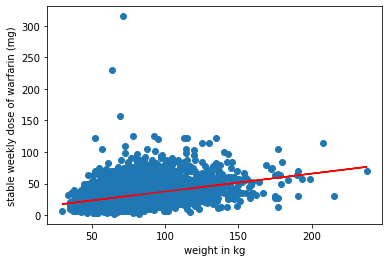

In [20]:
plt.scatter(weight,dose)
fit = np.poly1d(np.polyfit(weight,dose,deg=1))
plt.plot(weight,fit(weight),color='r')
plt.xlabel("weight in kg")
plt.ylabel("stable weekly dose of warfarin (mg)")
plt.savefig("weight_vs_dose")
plt.show()

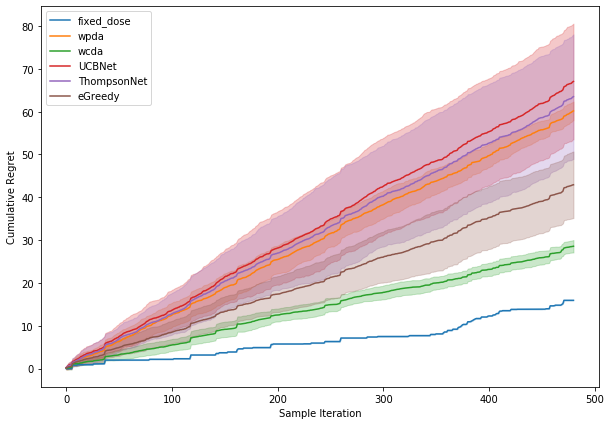

In [19]:
import numpy as np
import matplotlib.pyplot as plt

##Plotting
regret = True #true for regret plot, False for frac incorrect

models = ["fixed_dose", "wpda", "wcda","UCBNet", "ThompsonNet","eGreedy"]
model_performance = []
colors = ["C%d" % i for i in range(10)]
plt.rcParams["figure.figsize"] = (10,7)
for i,model in enumerate(models):
    data_list = np.load("data/"+ model+"_regret.npy") if regret else np.load("data/"+ model+"_frac_incorrect.npy")        
    mean = np.mean(data_list,axis=0)
    if not regret: model_performance.append(mean[-1])
    x = range(len(mean))
    std = np.std(data_list,axis=0)
    #print(np.mean(std))
    plt.plot(x,mean,color=colors[i],label=model)    
    plt.fill_between(x, mean - std, mean + std, color=colors[i],alpha=0.25)
plt.legend()
plt.xlabel("Sample Iteration")
if regret: 
    plt.ylabel("Cumulative Regret")
    plt.savefig("regret_for_models")
    #plt.xlim([0,500])
    #plt.ylim([0,200])
else: 
    plt.ylim([.1,.5])
    plt.ylabel("Fraction Incorrect")
    plt.savefig("frac_incorrect")

plt.show()

Text(0, 0.5, 'Fraction Incorrect (averaged)')

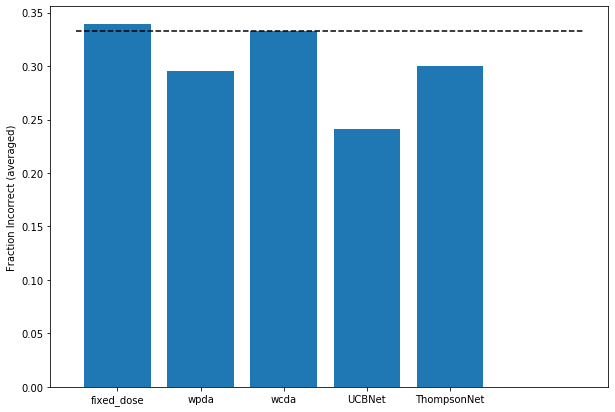

In [12]:
plt.bar(models,model_performance)
baseline = model_performance[models.index("wcda")]
plt.hlines(baseline,-.5,5.6,linestyles="dashed",color='k')
plt.ylabel("Fraction Incorrect (averaged)")